In [112]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

def load_data() -> dict[str, pd.DataFrame]:
	"""
	Load data from CSV files in the 'csv' directory and return a dictionary of DataFrames.

	Returns:
		dict[str, pd.DataFrame]: A dictionary where the keys are the names of the CSV files
		(extracted from the file names) and the values are the corresponding DataFrames.
	"""
	data = {}
	for file in os.listdir("csv"):
		if file.startswith("predictions"):
			name = file.split("_")[1:]
			name = "_".join(name).split(".")[0]
			data[name] = pd.read_csv("csv/" + file)
	return data

In [113]:
dfs = load_data()

In [118]:
def calculate_metrics(dfs: dict[str, pd.DataFrame]):
	metrics = {}
	for model_name, df in dfs.items():
		predictions = df["predictions"]
		actuals = df["actual"]

		errors = predictions - actuals
		mape = (errors.abs() / actuals.abs()).mean() * 100
		std = (errors.abs() / actuals.abs()).std() * 100

		metrics[model_name] = {"MAPE": mape, "STD": std}
	
	return metrics

def plot_MAPE(metrics):
	df_metrics = pd.DataFrame(metrics).T
	fig, ax = plt.subplots(figsize=(12, 8))
	
	# Order from lower to highest, change to horizontal and add colors

	df_metrics.sort_values('MAPE', ascending=False, inplace=True)
	colors = sns.color_palette('viridis', len(df_metrics))
	bars = ax.barh(df_metrics.index, df_metrics['MAPE'], xerr=df_metrics['STD'], capsize=4, color=colors)
	ax.set_xlabel('MAPE (%)')
	ax.set_title('Model Metrics')

	for bar, std in zip(bars, df_metrics['STD']):
		width = bar.get_width()
		ax.text(width * 1.001, bar.get_y() + bar.get_height() / 2 * 1.25, f'{std:.2f}', ha='left', va='center')

	plt.show()
	
def plot_errors(dfs: dict[str, pd.DataFrame]):
	plt.figure(figsize=(10, 6))
	for model_name, df in dfs.items():
		continue
		"""
		TODO: 
			- X-axis: total_time_target (Actual, in log scale? like a histogram moving in ranges)
			- Y-axis: cummulative MAPE in that range
		"""
	plt.title("Prediction Errors")
	plt.xlabel("Error")
	plt.ylabel("Frequency")
	plt.legend()
	plt.show()

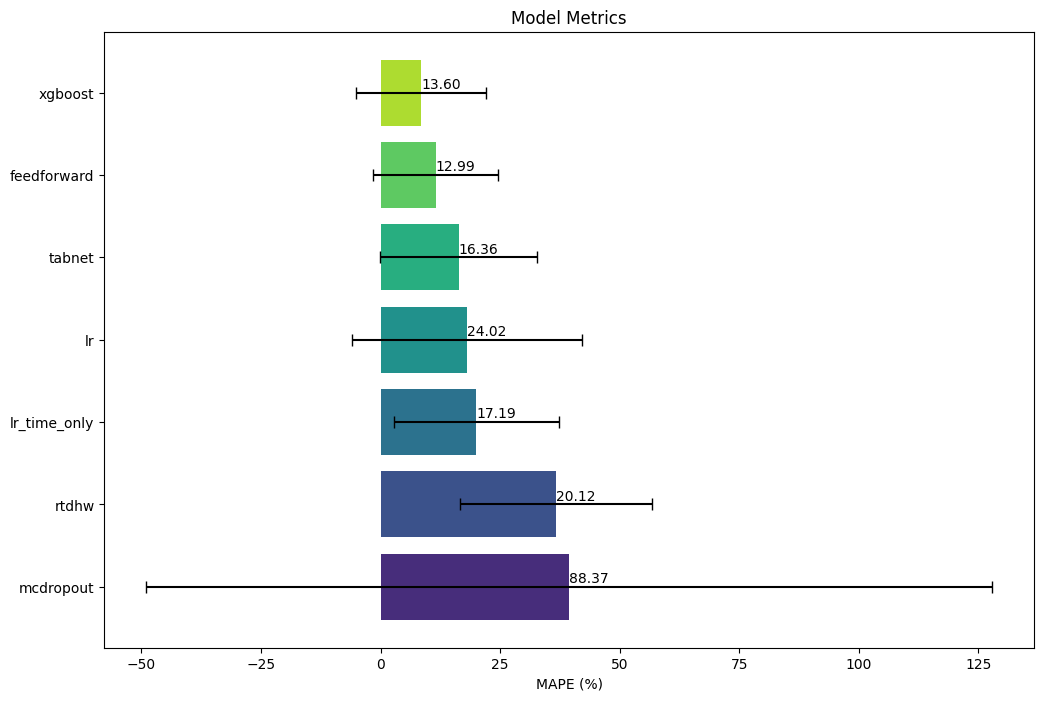

In [115]:
metrics = calculate_metrics(dfs)
plot_MAPE(metrics)

In [119]:
plot_errors(dfs)

KeyError: 'MAPE'

<Figure size 1000x600 with 0 Axes>